In [1]:
%matplotlib inline

# Overview

**This code is for analyzing patterns of the different weight files which should have already been computed**

In [15]:
import numpy as np
import glob
from scipy import stats

from matplotlib import pyplot as plt

**Just some details for making prettier plots**

In [16]:
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['axes.titlesize'] = 12

matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.color'] = '0.5'
matplotlib.rcParams['grid.linewidth'] = '0.5'

matplotlib.rcParams['axes.edgecolor'] = '0.25'
matplotlib.rcParams['xtick.color'] = '0'
matplotlib.rcParams['ytick.color'] = '0'

matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['axes.spines.right'] = True
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.top'] = True
matplotlib.rcParams['axes.spines.bottom'] = True

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'helvetica'
matplotlib.rcParams['font.weight']='normal'
matplotlib.rcParams['axes.axisbelow'] = True

**And I use this for setting up the creation of new results folders depending on the month/year. This is where files/images will be saved so feel free to alter accordingly**

In [4]:
import datetime
year = datetime.date.today().year
month = datetime.date.today().month
import os
figs_dir = '../Results/Figures/{}_{:02}'.format(year, month)
if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)

**Functions for plotting the lorenz curve and calculating the GINI coefficient. Largely stolen from online sources and triple checked to make sure they make sense/work as intended**

In [17]:
def get_gini(arr):
    count = arr.size
    coefficient = 2. / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def get_lorenz(arr):
    X_lorenz = arr.cumsum() / arr.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    return (np.linspace(0.0, 1.0, X_lorenz.size), X_lorenz)

# Looking at an example protein

In [18]:
example_prot_name = '1aoeA'
methods_of_interest = ['uniform', 'simple_0.8', 'HH_meanScale', 'GSC_meanScale', 'ACL_meanScale']
weights_dict = {}
for method in methods_of_interest:
    weights_dict[method] = []
for weight_file in sorted(glob.glob('../Data/weights/{}*.weights'.format(example_prot_name)))[:]:
    prot_name = weight_file.split('/')[-1].split('_')[0]
    method = weight_file.split('/')[-1].replace(prot_name+'_', '').replace('.weights', '')
    if method in methods_of_interest:
        weights = np.genfromtxt(weight_file)
        weights_dict[method] = weights

** These are most certainly not the most efficiently drawn plots but look nice! **

uniform
simple_0.8
HH_meanScale
GSC_meanScale
ACL_meanScale


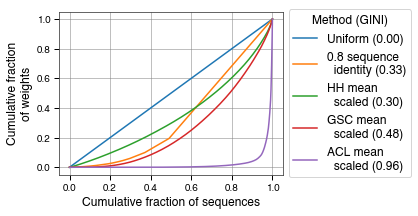

In [19]:
fig, ax = plt.subplots(figsize=(5,3))
ginis = []
for method_of_interest in methods_of_interest[:]:
    print(method_of_interest)
    X = np.array(sorted(weights_dict[method_of_interest]))
    ginis.append(get_gini(X))
    x,y = get_lorenz(X)
    ax.plot(x, y, marker='')

ax.lines[0].set_label('Uniform ({:.2f})'.format(ginis[0]))
ax.lines[1].set_label('0.8 sequence\n  identity ({:.2f})'.format(ginis[1]))
ax.lines[2].set_label('HH mean\n  scaled ({:.2f})'.format(ginis[2]))
ax.lines[3].set_label('GSC mean\n  scaled ({:.2f})'.format(ginis[3]))
ax.lines[4].set_label('ACL mean\n  scaled ({:.2f})'.format(ginis[4]))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
leg.set_title('Method (GINI)',prop={'size':12})
ax.set_xlabel('Cumulative fraction of sequences')
ax.set_ylabel('Cumulative fraction\nof weights')
# plt.savefig('{}/gini_example.pdf'.format(figs_dir), bbox_inches='tight')

# Repeating for lots of proteins

In [ ]:
methods_of_interest = ['uniform', 'simple_0.8', 'HH_meanScale', 'GSC_meanScale', 'ACL_meanScale']
weights_dict = {}
for method in methods_of_interest:
    weights_dict[method] = []
for weight_file in sorted(glob.glob('../Data/weights/*.weights')):
    prot_name = weight_file.split('/')[-1].split('_')[0]
    method = weight_file.split('/')[-1].replace(prot_name+'_', '').replace('.weights', '')
    if method in methods_of_interest:
        weights = np.genfromtxt(weight_file)
        weights_dict[method].append(weights)

In [ ]:
gini_dict = {}
for method in methods_of_interest:
    for i in weights_dict[method]:
        arr = np.sort(i)
        try:
            gini_dict[method].append(get_gini(arr))
        except:
            gini_dict[method] = [get_gini(arr)]

In [ ]:
print(methods_of_interest)

**Draw out some more complicated figures that look good**

In [ ]:
boxes = []
for method in methods_of_interest:
    boxes.append(gini_dict[method])
labels = ['Uniform', '0.8 sequence identity','HH mean scaled', 'GSC mean scaled', 'ACL mean scaled']
fig, ax = plt.subplots(figsize=(4,5))
bplot = ax.boxplot(boxes[::-1], labels=labels[::-1], widths=0.6, vert=False, patch_artist=True);
for patch in bplot['boxes']:
    patch.set_facecolor('white')
    patch.set_linewidth(2)
for median in bplot['medians']:
    median.set_linewidth(2.5)
for whisker in bplot['whiskers']:
    whisker.set_linewidth(2)
for cap in bplot['caps']:
    cap.set_linewidth(2)
ax.set_xlabel('GINI coefficient', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=16)
# plt.savefig('{}/gini_all.pdf'.format(figs_dir), bbox_inches='tight')

**Test the correlation between different methods**

In [ ]:
methods_of_interest = ['uniform', 'simple_0.8', 'HH_meanScale',\
                       'GSC_meanScale', 'ACL_meanScale']
weights_dict = {}
for method in methods_of_interest:
    weights_dict[method] = []
for weight_file in sorted(glob.glob('../Data/*.weights'))[:]:
    prot_name = weight_file.split('/')[-1].split('_')[0]
    method = weight_file.split('/')[-1].replace(prot_name+'_', '').replace('.weights', '')
    if method in methods_of_interest:
        weights = np.genfromtxt(weight_file)
        weights_dict[method].append(weights)

In [ ]:
matrix = []
for i, method_a in enumerate(methods_of_interest):
    new_line = []
    if method_a == 'uniform':
        continue
    print('##############################')
    for method_b in methods_of_interest:
        if method_b == 'uniform':
            continue
        print(method_a, method_b)
        zipped = zip(weights_dict[method_a], weights_dict[method_b])
        correlations = []
        for weights_a,weights_b in zipped:
            correlations.append(stats.spearmanr(weights_a,weights_b)[0])
        print(np.median(correlations))
        new_line.append(np.median(correlations))
    matrix.append(new_line)

In [ ]:
print(methods_of_interest)

**And plot it out**

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
matrix = np.array(matrix)
cax = ax.matshow(matrix, vmin=0, vmax=1.0)
ax.grid(False)

labels = ['0.8 sequence identity', 'HH mean scaled', 'GSC mean scaled', 'ACL mean scaled']
ax.set_xticklabels(['']+labels, rotation=30, ha='left')
labels = ['0.8 sequence\n  identity', 'HH mean\n  scaled', 'GSC mean\n  scaled', 'ACL mean\n  scaled']
ax.set_yticklabels(['']+labels)
plt.colorbar(cax, label=r"Spearman's $\rho$ (median)", fraction=0.047, pad=0.10)

for y in range(matrix.shape[0]):
    for x in range(matrix.shape[1]):
        if x == y:
            color='black'
            tformat = '%.1f'
        else:
            color='white'
            tformat = '%.3f'
        plt.text(x , y, tformat % matrix[y, x],
                 horizontalalignment='center',
                 verticalalignment='center', color=color
                 )
# plt.savefig('{}/weights_corr.pdf'.format(figs_dir), bbox_inches='tight')

# Comparing regular and RelTime weights

In [6]:
methods_of_interest = ['GSC_meanScale', 'ACL_meanScale', 'GSC_meanScale.RelTime', 'ACL_meanScale.RelTime']
weights_dict = {}
for method in methods_of_interest:
    weights_dict[method] = []
for weight_file in sorted(glob.glob('../Data/weights/*.weights')):
    prot_name = weight_file.split('/')[-1].split('_')[0]
    method = weight_file.split('/')[-1].replace(prot_name+'_', '').replace('.weights', '')
    if method in methods_of_interest:
        weights = np.genfromtxt(weight_file)
        weights_dict[method].append(weights)

In [7]:
gini_dict = {}
for method in methods_of_interest:
    for i in weights_dict[method]:
        arr = np.sort(i)
        try:
            gini_dict[method].append(get_gini(arr))
        except:
            gini_dict[method] = [get_gini(arr)]

In [13]:
print(np.median(gini_dict['ACL_meanScale']), np.median(gini_dict['ACL_meanScale.RelTime']))
print(stats.wilcoxon(gini_dict['ACL_meanScale'], gini_dict['ACL_meanScale.RelTime']))

0.8918374659956214 0.8280215158982713
WilcoxonResult(statistic=0.0, pvalue=3.3569019045910546e-26)


In [14]:
print(np.median(gini_dict['GSC_meanScale']), np.median(gini_dict['GSC_meanScale.RelTime']))
print(stats.wilcoxon(gini_dict['GSC_meanScale'], gini_dict['GSC_meanScale.RelTime']))

0.48138936487439765 0.411193678363188
WilcoxonResult(statistic=11.0, pvalue=4.1932407400564246e-26)
